Final Project, Part 3: Exploratory Data Analysis

(As presented in the first part of final project, I will explore the movie box office/rating data set and try to find if there is any statistical trend in a movie franchise series. My assumption is that sequels are likely to perform better in box office, but the critical receptions are worse compared to the originals.)

In [26]:
#General imports
import numpy as np
import pandas as pd
import seaborn as sns  # Plots!
import matplotlib.pyplot as plt

# Set the figure size for plotting
sns.mpl.rc("figure", figsize=(10,4))

%matplotlib inline

In [33]:
#import the movie database. These are data of movies from 2010-2016

db_all = pd.read_csv("movies.csv")
db_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 30 columns):
color                        1482 non-null object
director_name                1495 non-null object
num_critic_for_reviews       1470 non-null float64
duration                     1487 non-null float64
director_facebook_likes      1495 non-null int64
actor_3_facebook_likes       1487 non-null float64
actor_2_name                 1488 non-null object
actor_1_facebook_likes       1491 non-null float64
gross                        1140 non-null float64
genres                       1495 non-null object
actor_1_name                 1491 non-null object
movie_title                  1495 non-null object
has_sequal                   1495 non-null int64
sequal_num                   1495 non-null int64
num_voted_users              1495 non-null int64
cast_total_facebook_likes    1495 non-null int64
actor_3_name                 1487 non-null object
facenumber_in_poster         1482 non-null 

In [44]:
# let's only look at the columns that intertest us
idx_IN_columns = [11, 8,12,13,24,27,29]
db = db_all.ix[:,idx_IN_columns]
db.head()

movie_title        gross  has_sequal  sequal_num  \
0  Batman v Superman: Dawn of Justice   330249062.0           1           2   
1          Captain America: Civil War   407197282.0           1           2   
2                    Star Trek Beyond   130468626.0           1           3   
3                The Legend of Tarzan   124051759.0           0           0   
4                   X-Men: Apocalypse   154985087.0           1           6   

        budget  imdb_score  movie_facebook_likes  
0  250000000.0         6.9                197000  
1  250000000.0         8.2                 72000  
2  185000000.0         7.5                 30000  
3  180000000.0         6.6                 29000  
4  178000000.0         7.3                 54000

In [45]:
# only look at movie that has sequal
db_hasSequal = db.loc[db['has_sequal'] == 1]
db_hasSequal.head()

movie_title        gross  has_sequal  sequal_num  \
0  Batman v Superman: Dawn of Justice   330249062.0           1           2   
1          Captain America: Civil War   407197282.0           1           2   
2                    Star Trek Beyond   130468626.0           1           3   
4                   X-Men: Apocalypse   154985087.0           1           6   
5                       Suicide Squad   161087183.0           1           3   

        budget  imdb_score  movie_facebook_likes  
0  250000000.0         6.9                197000  
1  250000000.0         8.2                 72000  
2  185000000.0         7.5                 30000  
4  178000000.0         7.3                 54000  
5  175000000.0         6.9                 80000

In [46]:
#Try to see if there is any correlation between the column
db_hasSequal.corr()

gross  has_sequal  sequal_num    budget  imdb_score  \
gross                 1.000000         NaN    0.005024  0.713372    0.569310   
has_sequal                 NaN         NaN         NaN       NaN         NaN   
sequal_num            0.005024         NaN    1.000000  0.125085    0.007714   
budget                0.713372         NaN    0.125085  1.000000    0.478116   
imdb_score            0.569310         NaN    0.007714  0.478116    1.000000   
movie_facebook_likes  0.582310         NaN   -0.023696  0.577737    0.473573   

                      movie_facebook_likes  
gross                             0.582310  
has_sequal                             NaN  
sequal_num                       -0.023696  
budget                            0.577737  
imdb_score                        0.473573  
movie_facebook_likes              1.000000

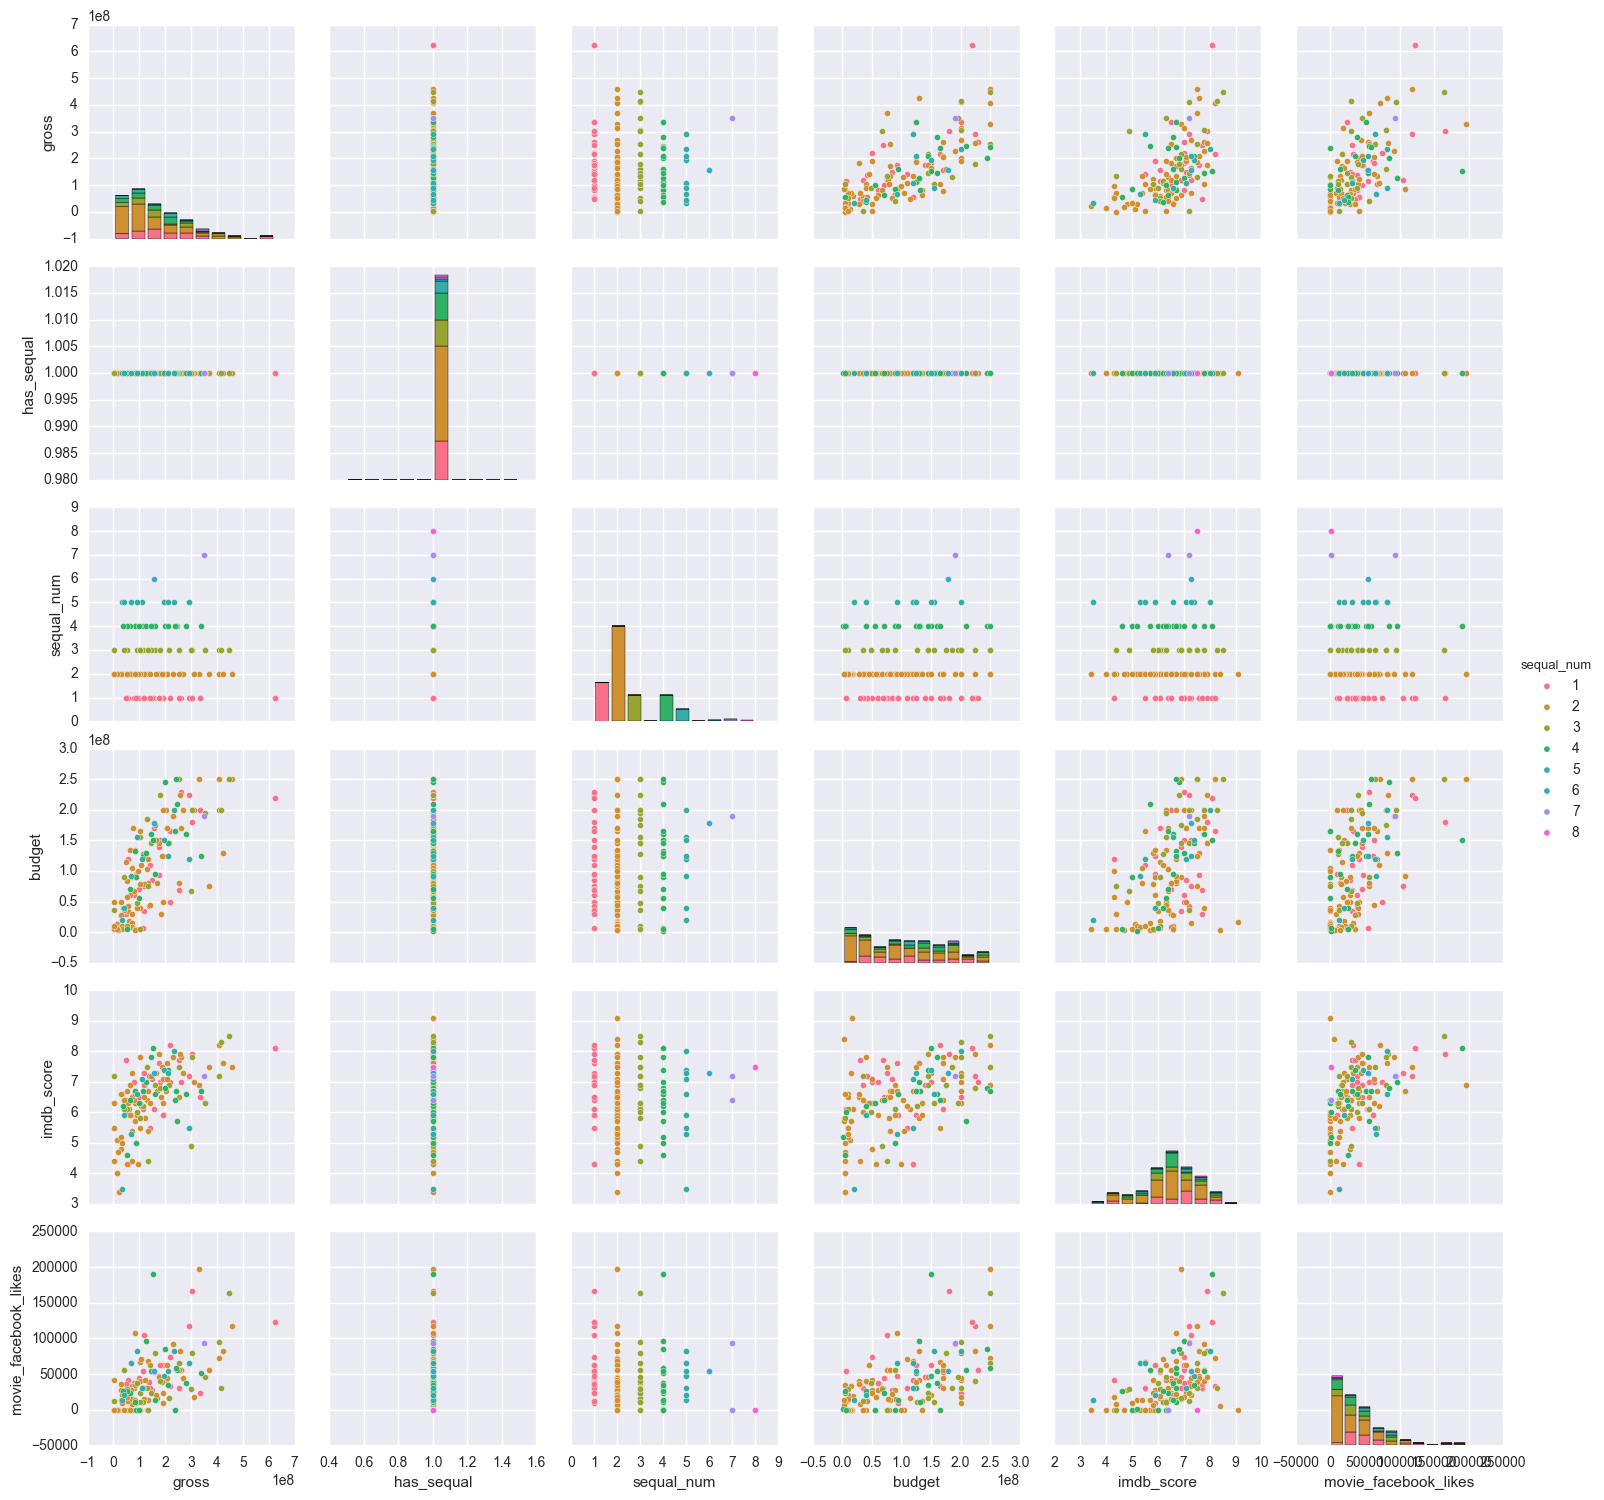

In [49]:
sns.pairplot(db_hasSequal, hue="sequal_num")
sns.plt.show()

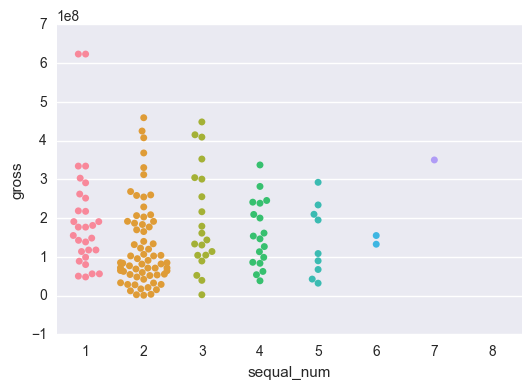

In [31]:
# check if there is any trend in sequal number vs gross
sns.swarmplot(x="sequal_num", y="gross", data=db_hasSequal)

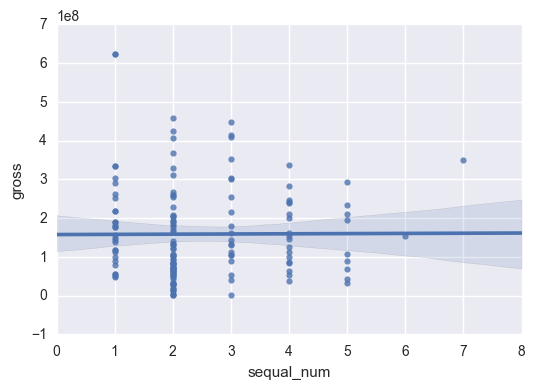

In [47]:
sns.regplot(x="sequal_num", y="gross", data=db_hasSequal);

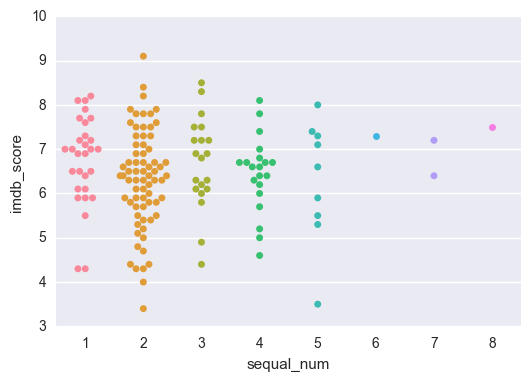

In [38]:
# check if there is any trend in sequal number vs IMDB Score
sns.swarmplot(x="sequal_num", y="imdb_score", data=db_hasSequal)

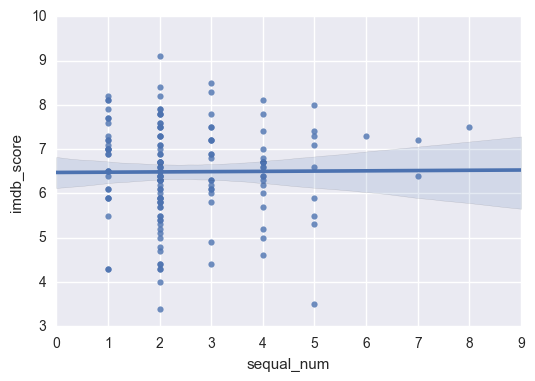

In [48]:
sns.regplot(x="sequal_num", y="imdb_score", data=db_hasSequal);